In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Projects\Hotel Booking Cancellation Prediction\hotel_bookings_cleaned.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-01


# Overall Cancellation Rate

In [6]:
df['is_canceled'].value_counts(normalize=True)

0    0.727182
1    0.272818
Name: is_canceled, dtype: float64

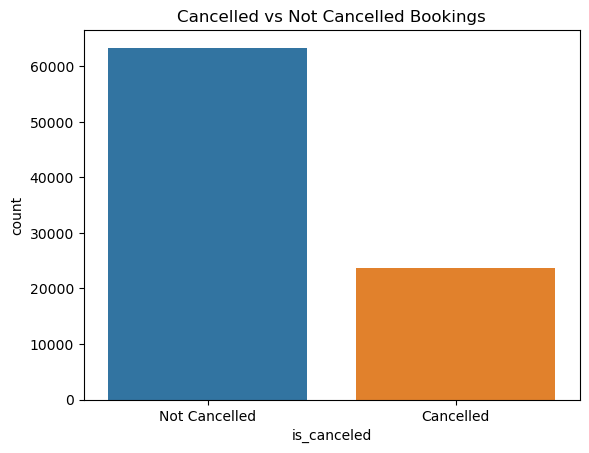

In [7]:
sns.countplot(data = df, x = 'is_canceled')
plt.title('Cancelled vs Not Cancelled Bookings')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()

# Cancellation by Hotel Type

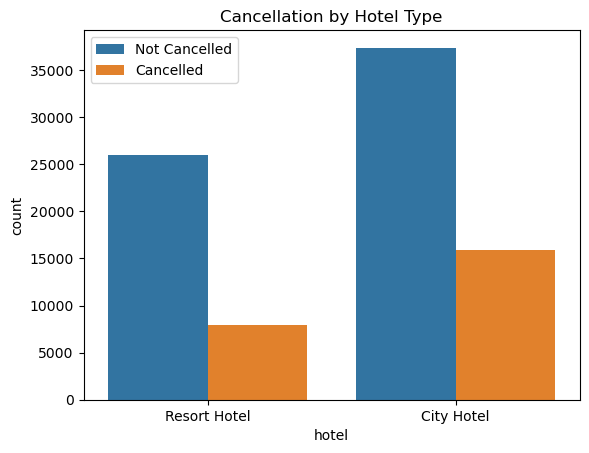

In [12]:
sns.countplot(data = df, x = 'hotel', hue = 'is_canceled')
plt.title('Cancellation by Hotel Type')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

# Cancellation by Month

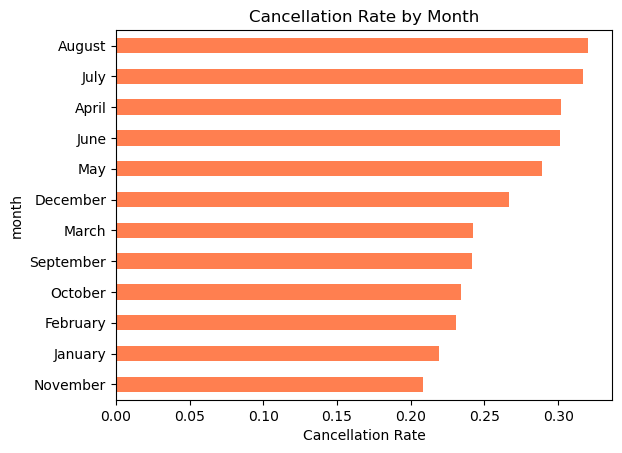

In [13]:
df['month'] = pd.to_datetime(df['arrival_date']).dt.month_name()

month_cancel = df.groupby('month')['is_canceled'].mean().sort_values()
month_cancel.plot(kind='barh', color='coral')
plt.title('Cancellation Rate by Month')
plt.xlabel('Cancellation Rate')
plt.show()

# Top Countries by Cancellation

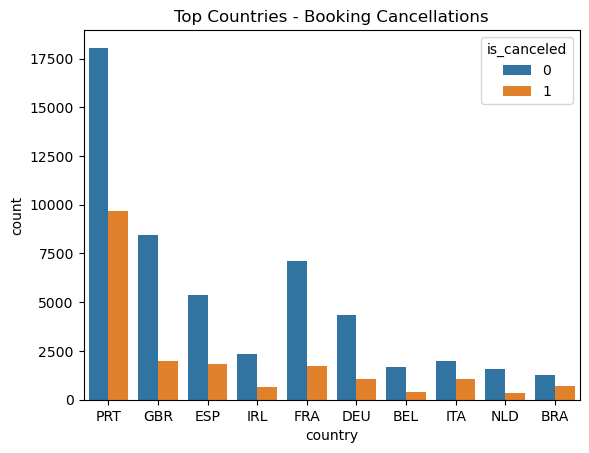

In [14]:
top_countries = df['country'].value_counts().head(10).index
df_top = df[df['country'].isin(top_countries)]

sns.countplot(data=df_top, x='country', hue='is_canceled')
plt.title('Top Countries - Booking Cancellations')
plt.show()

# Lead Time and Cancellation Relationship

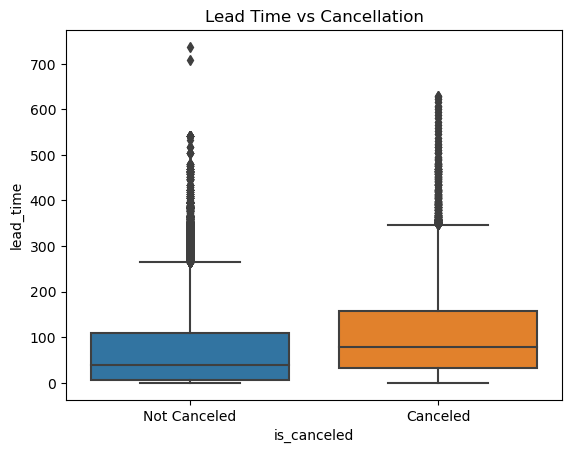

In [15]:
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs Cancellation')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

# Room Type and Cancellation Relationship

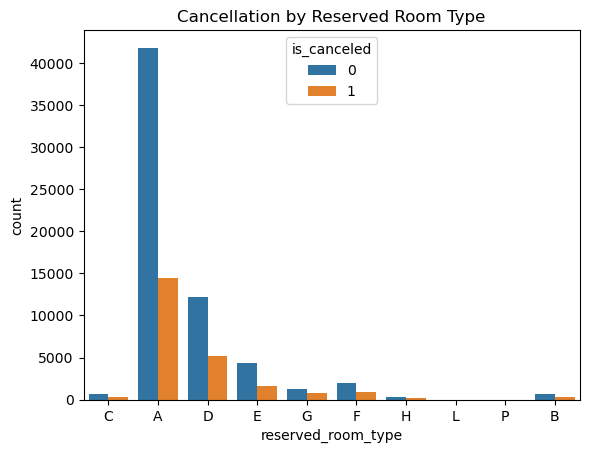

In [16]:
sns.countplot(data=df, x='reserved_room_type', hue='is_canceled')
plt.title('Cancellation by Reserved Room Type')
plt.show()

# Special Requests and Cancellation Relationship

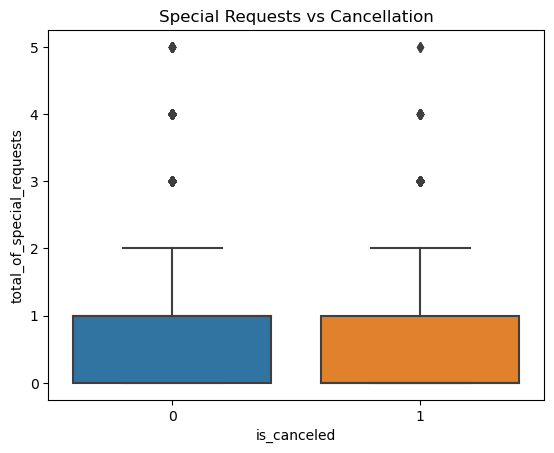

In [17]:
sns.boxplot(data=df, x='is_canceled', y='total_of_special_requests')
plt.title('Special Requests vs Cancellation')
plt.show()